In [1]:
from astropy.io import fits
from astropy import constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from voigt_fit_lib import *

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
nodes_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_nodes.fits')
ids_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_identifications.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
nodes_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_nodes.fits')
ids_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_identifications.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
nodes_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_nodes.fits')
ids_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_identifications.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
nodes_fits_list = [nodes_fits_fuv, nodes_fits_nuv, nodes_fits_stis]
ids_fits_list = [ids_fits_fuv, ids_fits_nuv, ids_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_fuv]

Load in the ions table for atomic data

In [7]:
ions_table = np.loadtxt('/Users/thepoetoftwilight/Documents/CUBS/pabs0/data/linelists/atom.dat', dtype=str)

Create an ion object for a species in COS FUV

In [8]:
ion = ion('HI1025', 51, 'FUV')

In [9]:
ion.grab_ion_info(ids_fits_list, ions_table)

In [10]:
ion.grab_ion_spec(spec_fits_list, v_range=[-200,200], v_abs_range=[-90,110], degree=1)

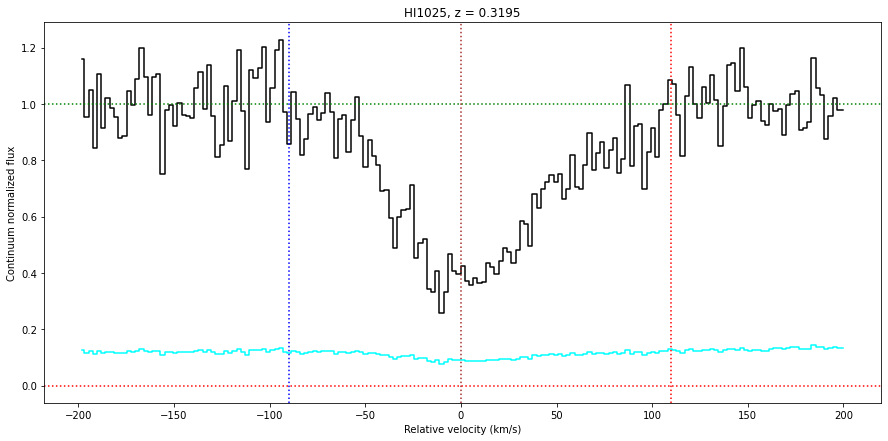

In [11]:
fig, ax = plt.subplots(1, figsize=(15,7))

ion.plot_ion_spec(ax)

In [12]:
ion.grab_ion_lsf(lsf_fits_list)

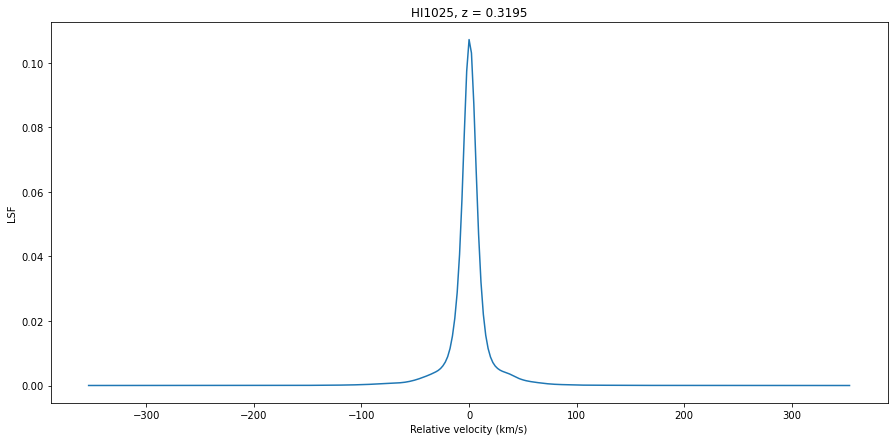

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 7))

ion.plot_ion_lsf(ax)

In [14]:
ion.init_multi_voigt(init_values = np.array([[14.3, 30, 0], [13.8, 40, 10]]), lsf_convolve = True)

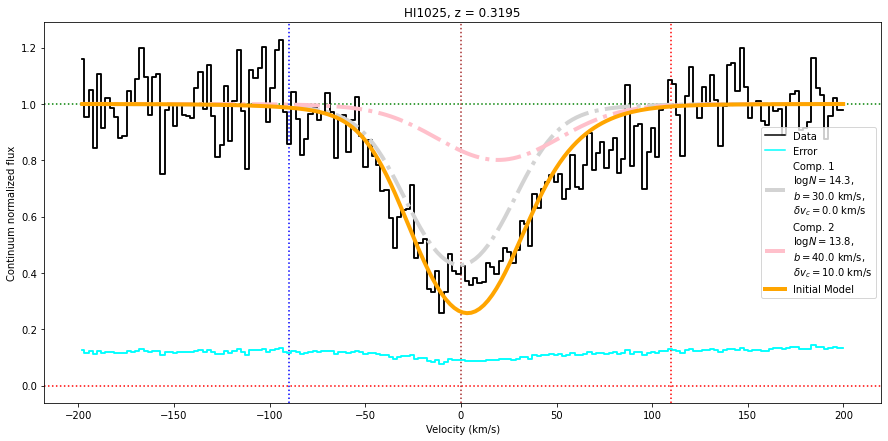

In [15]:
fig, ax = plt.subplots(1, figsize=(15, 7))

ion.plot_init_profile(ax, legend=True)

In [16]:
ion.fit_multi_voigt()

/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument wav0_obs does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument f does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument gamma does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The keyword argument {name} does not " +
/Users/thepoetoftwilight/opt/anaconda3/lib/python3.8/site-packages/lmfit/model.py:990: UserWarning: The keyword argument lsf_convolve does not match any arguments of the model function. It will be ignored.
  warnings.warn(f"The

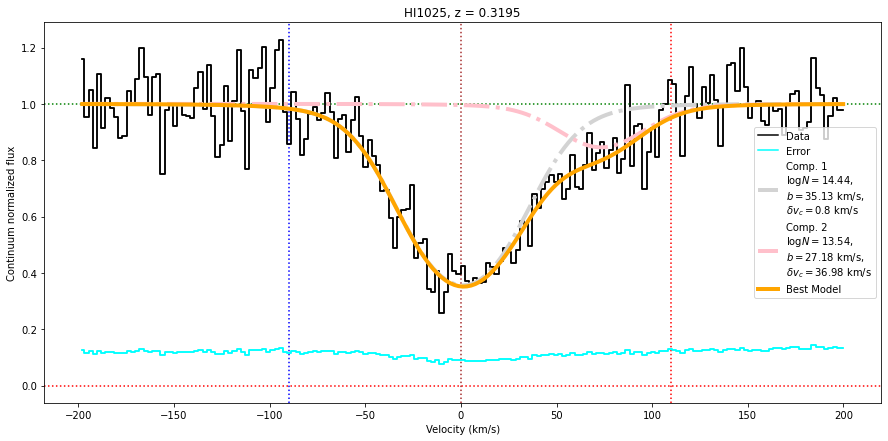

In [17]:
fig, ax = plt.subplots(1, figsize=(15, 7))

ion.plot_best_profile(ax, legend=True)